# Capstone 1: ASEAN Investment Vehicle Analysis

## 1. Data Collection
We will download historical data for selected ASEAN ETFs, REITs, and Stocks using `yfinance`.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tickers = {
    'Indonesia ETF': 'EIDA.JK',
    'Singapore ETF': 'EWS',
    'Malaysia ETF': 'EWM',
    'Philippines ETF': 'EPHE',
    'Vietnam ETF': 'VNM',
    'CapitaLand Integ. Comm. Trust': 'C38U.SI',
    'Ascendas REIT': 'A17U.SI',
    'DBS Group': 'D05.SI',
    'Maybank': '1155.KL',
    'BCA': 'BBCA.JK'
}

start_date = '2015-01-01'
end_date = '2024-01-01'

data = {}
for name, ticker in tickers.items():
    print(f"Downloading {name} ({ticker})...")
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty:
        data[name] = df
    else:
        print(f"Failed to download {ticker}")


/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: EIDA.JK"}}}

1 Failed download:
['EIDA.JK']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Failed to download EIDA.JK


/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_49264/2420392690.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


## 2. Data Cleaning & Inspection
We will check for missing values and align the dates.

In [3]:
# Combine Close prices into a single DataFrame
close_prices = pd.DataFrame()

for name, df in data.items():
    # Handle MultiIndex columns if present (common in recent yfinance versions)
    if isinstance(df.columns, pd.MultiIndex):
        close = df['Close'].iloc[:, 0] # Take the first column if multiple levels
    else:
        close = df['Close']
    
    close_prices[name] = close

# Forward fill missing data (due to different holidays in ASEAN countries)
close_prices = close_prices.ffill().dropna()

print(close_prices.head())
print(close_prices.shape)

            Singapore ETF  Malaysia ETF  Philippines ETF  Vietnam ETF  \
Date                                                                    
2015-01-02      16.751520     25.951019        33.722988    16.188828   
2015-01-05      16.389881     25.340183        33.324799    15.881927   
2015-01-06      16.196146     25.103722        33.607960    16.103580   
2015-01-07      16.376966     25.359880        34.085800    16.060959   
2015-01-08      16.712772     25.734278        34.678677    16.078007   

            CapitaLand Integ. Comm. Trust  Ascendas REIT  DBS Group   Maybank  \
Date                                                                            
2015-01-02                       1.166972       1.281668  11.005094  4.554530   
2015-01-05                       1.172693       1.287007  10.758151  4.494604   
2015-01-06                       1.155531       1.265647  10.645418  4.394723   
2015-01-07                       1.189854       1.281668  10.629310  4.299836   
20

## 3. Exploratory Data Analysis (EDA)
Visualizing price history and correlations.

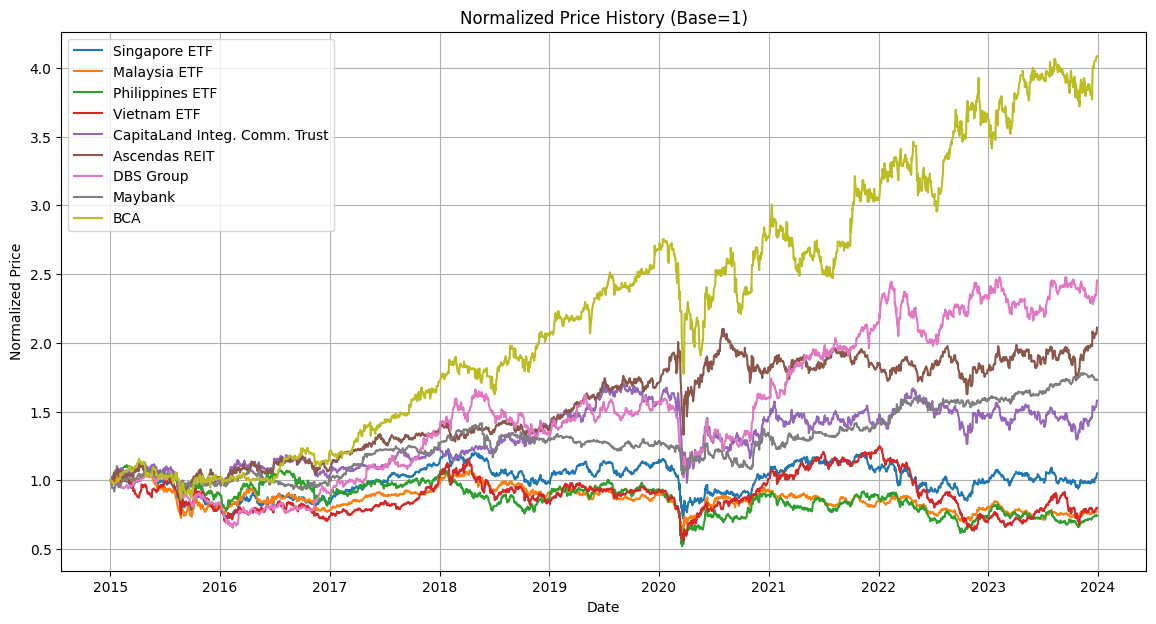

In [4]:
plt.figure(figsize=(14, 7))
for col in close_prices.columns:
    plt.plot(close_prices.index, close_prices[col] / close_prices[col].iloc[0], label=col)

plt.title('Normalized Price History (Base=1)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

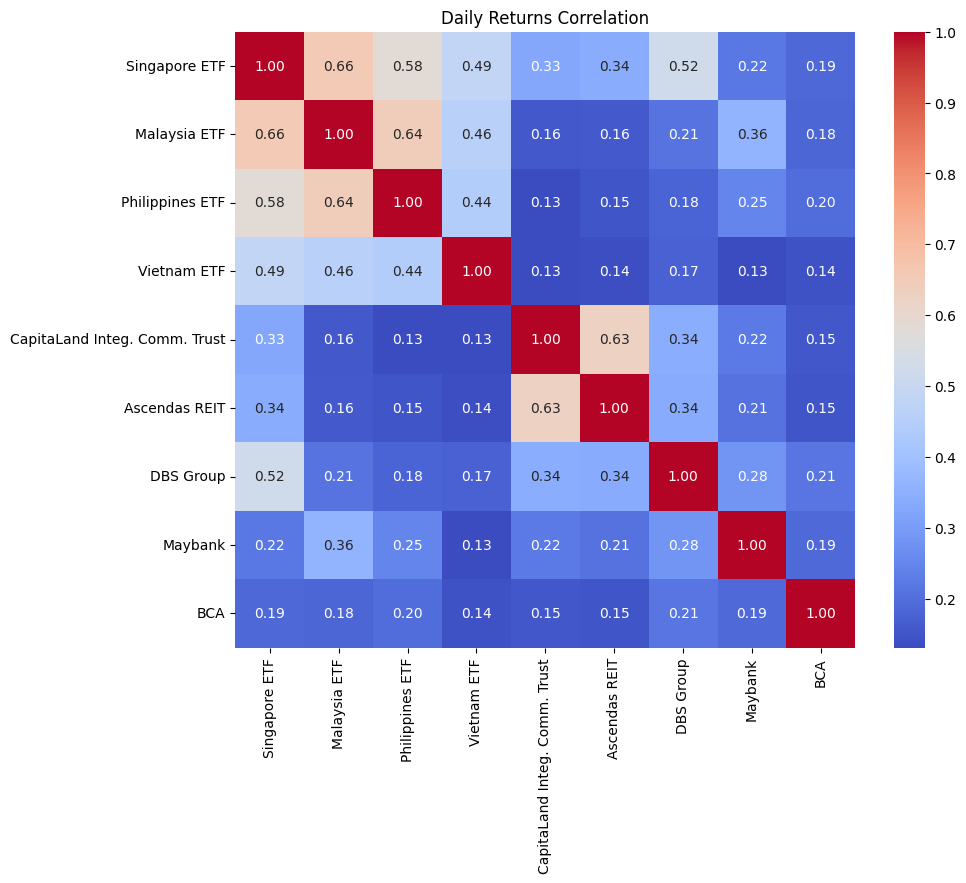

In [5]:
# Correlation Matrix
returns = close_prices.pct_change().dropna()
corr = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Daily Returns Correlation')
plt.show()

In [6]:
# Save the raw combined data
close_prices.to_csv('asean_market_data.csv')
print("Data saved to asean_market_data.csv")

Data saved to asean_market_data.csv
